In [281]:
#Dependencies and setups 

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [282]:
#  load our files that we will be using 

DF1RIDE= pd.read_csv("ride_data.csv")
DF1RIDE.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/18 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/18 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/18 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/18 23:22,23.44,5.149250e+12
4,South Jack,3/6/18 4:28,34.58,3.908450e+12


In [283]:
DF2CITY = pd.read_csv("city_data.csv") 
DF2CITY.head()




,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [284]:
# Combining Data 
combined_data = pd.merge(DF1RIDE,DF2CITY, how ="outer", on="city" )
combined_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/18 10:14,13.83,5.739410e+12,5,Urban
1,Lake Jonathanshire,4/7/18 20:51,31.25,4.441250e+12,5,Urban
2,Lake Jonathanshire,3/9/18 23:45,19.89,2.389500e+12,5,Urban
3,Lake Jonathanshire,4/7/18 18:09,24.28,7.796810e+12,5,Urban
4,Lake Jonathanshire,1/2/18 14:14,13.89,4.242550e+11,5,Urban


#A DESCRIPTION OF THREE TRENDS BASED ON THE DATA 
----------------------------------------------

* LETS START WITH Bubble Plot of Ride Sharing Data
   given the information that found in the bubble plot , it clearly indicates that the number of drivers
    as well as rides are in the Urban City , this shows that in Urban city the demand is greater than those
    in Suburban and Rural city , however the average fare is more Suburban and Rural city in few cases . 
    
* All three pie charts gives a clear picture on how urban city has achieved a higher percentage of the Total Fare ,Total Rides and Total drivers so to speak.  
  the three pie (% Fare by city Type,% Total Drivers by City Type , % Total Rides by City Type) helps us to 
  break down the informaion and have a clear understanding of our trends. 
    
  *## Total Fares by City Type
    
  The higher revenue comes from Urban City customers  with 62.7 % to be exact .
  However , nearly half of the urban portion comes from Suburban customers with only 30.5 %, 
  this can be consider to be a significant portion for our fare revenue , since the average fare
  is consistently higher.


   **## Total Rides by City Type

   The number of Rides in the Urban city also is higher compare to the ones in Suburban and Rural cities ,
   this provide clear information on which city type to give more attention if we need to make profit , 
   because the number of rides is less in the cities mentioned above , wa can conclude that the profit will 
   be less compare to the profit that can be obtained in the Urban cities . 
    
    
    
   ***## Total Drivers  by City Type

  The Higher number of drivers located in urban cities. However,
  given that in suburban cities the demand is less and this also affects the number of drivers 
  to a great degree, with the small number of drivers we are however, able to generate a non-negligible amount of
  revenue. 
 
 



# Bubble Plot of Ride Sharing Data

 Obtain the x and y coordinates for each of the three city types

 Build the scatter plots for each city types

 Incorporate the other graph properties

 Create a legend

 Incorporate a text label regarding circle size

 Save Figure

In [285]:
# creating data frame based on each city types (Urban, Suburban, Rural)

Urban = combined_data.loc[(combined_data["type"] == "Urban")]
Suburban = combined_data.loc[(combined_data["type"] == "Suburban")]
Rural = combined_data.loc[(combined_data ["type"] == "Rural")]

# URBAN STATUS 

avg_fare_Urban = Urban.groupby(["city"])["fare"].mean()
total_rides_urban = Urban.groupby(["city"]).count()["ride_id"]
total_drivers_urban = Urban.groupby(["city"])["driver_count"].value_counts()

# SUBURBAN STATUS
avg__fare_Suburban = Suburban.groupby(["city"])["fare"].mean()
total_rides_Suburban = Suburban.groupby(["city"]).count()["ride_id"]
total_drivers_suburban = Suburban.groupby(["city"])["driver_count"].value_counts ()

# RULAR STATUS 

Average_Fare_Rural = Rural.groupby(["city"])["fare"].mean()
Total_rides_rural = Rural.groupby(["city"]).count()["ride_id"]
total_drivers_rural =Rural.groupby(["city"])["driver_count"].value_counts()



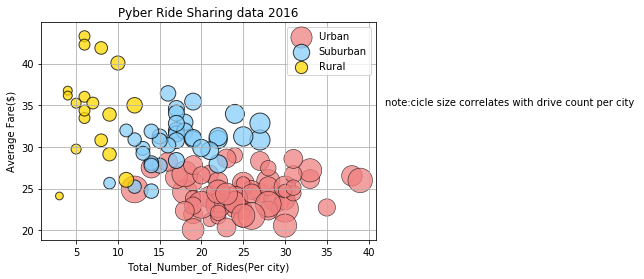

In [286]:

# CREATING A SCATTER PLOT FOR (URBAN ,RURAL , SUBURBAN )
#x = [20,40,20]
#y =[20,40,20]

plt.title("Pyber Ride Sharing data 2016")
plt.xlabel("Total_Number_of_Rides(Per city)")
plt.ylabel ("Average Fare($)")

x=plt.scatter(total_rides_urban ,avg_fare_Urban,total_drivers_rural*60,marker ="o",facecolor ="lightcoral",
              alpha =0.75, label = "Urban ",linewidths=0.6,edgecolor ="black")
y=plt.scatter(total_rides_Suburban ,avg__fare_Suburban,total_drivers_suburban*15,marker ="o",facecolors ="lightskyblue" ,
              edgecolors ="black",alpha =0.75, label = "Suburban",edgecolor ="black" )
z=plt.scatter(Total_rides_rural,Average_Fare_Rural, s=total_drivers_rural*20,marker ="o",
              facecolors ="gold" , edgecolors ="black",alpha =0.75, label = "Rural" ,edgecolor ="black")

# CREATE LEGEND 

legend = plt.legend(handles = [x, y,z], fontsize =9, title ="City Type", loc="best")
legend.legendHandles[0]._sizes =[30]
legend.legendHandles[1]._sizes =[30]
legend.legendHandles[2]._sizes =[30]
plt.legend(loc="upper right")
# INCORPORATE A TEXT LABEL REGARNDING CICLE SIZE
plt.text(42,35,"note:cicle size correlates with drive count per city ")
plt.grid()
# save figure
plt.savefig("combined_data .png")
plt.show()



# Total Fares by City Type
 Calculate Type Percents,
 Build Pie Chart,
 Save Figure

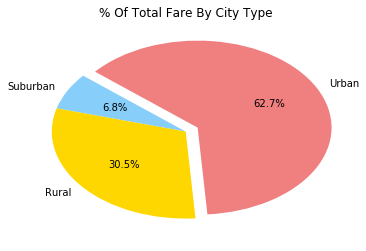

In [287]:
#Calculate Type Percents

plt.title("% Of Total Fare By City Type")
#plt.title =("% Of Total Fare By City Type")
Total_fare  = combined_data.groupby(["type"])["fare"].sum ()
percentage = Total_fare/Total_fare.sum()
#print(percentage)

# Build Pie 

labels = ["Suburban","Rural","Urban"]
explode = (0,0,0.1)
colors =["lightskyblue","gold","lightcoral"]
plt.pie(Total_fare, explode = explode , labels=labels ,
        autopct="%1.1f%%", colors = colors, startangle =140)
plt.savefig("% Of Total Fare By City Types.png")
plt.show()


# Total Rides by City Type
  Calculate Ride Percents,Build Pie Chart,Save Figure


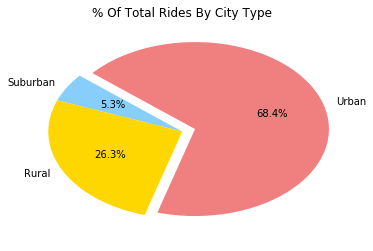

In [288]:
#Calculate Type Percents

plt.title("% Of Total Rides By City Type")
Total_ride  = combined_data.groupby(["type"])["ride_id"].count()
totalride_by_city = Total_ride / Total_ride.sum()

# Build Pie 

labels = ["Suburban","Rural","Urban"]
explode = (0,0,0.1)
colors =["lightskyblue","gold","lightcoral"]
plt.pie(totalride_by_city, explode = explode , labels=labels ,
        autopct="%1.1f%%", colors = colors, startangle =140)
plt.savefig("% Of Total Rides By City Type.png")
plt.show()


# Total Drivers by City Type
 Calculate Driver Percents, Build Pie Charts, Save Figure
 


type
Rural         18.062563
Suburban     288.261016
Urban       2004.776320
Name: driver_count, dtype: float64
type
Rural         18.062563
Suburban     288.261016
Urban       2004.776320
Name: driver_count, dtype: float64


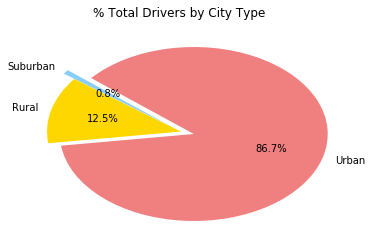

In [289]:
#Calculate Type Percents

Total_Drivers  = DF2CITY.groupby(["type"]).sum()["driver_count"] / DF2CITY["driver_count"].sum() 
print(Total_Drivers)
plt.title ("% Total Drivers by City Type ")
#percentage = Total_Drivers / Total_Drivers .sum ()
print(Total_Drivers)
# Build Pie 
labels = ["Suburban","Rural","Urban"]
colors = ["lightskyblue","gold","lightcoral"]
explode = [0.1,0,0.1]
plt.pie(Total_Drivers, explode = explode , labels=labels ,
        autopct="%1.1f%%", colors = colors, startangle =140)
plt.savefig("% Total Drivers by City Type ")
plt.show()
